<a href="https://colab.research.google.com/github/VishalGaurav1/Aerofitt_products_EDA/blob/main/Aerofit_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! gdown --id 1l6iL-3uP_o4UVpuJyEn793JbLy_PEkZm

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1l6iL-3uP_o4UVpuJyEn793JbLy_PEkZm
To: /content/aeor_data.csv
100% 7.43k/7.43k [00:00<00:00, 10.7MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
aerofit=pd.read_csv('aeor_data.csv')
aerofit.head()

,Produ,Ag,Gen,Edn,Martts,U,F,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Produ   180 non-null    object
 1   Ag      180 non-null    int64 
 2   Gen     180 non-null    object
 3   Edn     180 non-null    int64 
 4   Martts  180 non-null    object
 5   U       180 non-null    int64 
 6   F       180 non-null    int64 
 7   Income  180 non-null    int64 
 8   Miles   180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Visual Analysis for Product Usage across different Income levels,Age,Usage,Miles,Education

In [5]:
aerofit=aerofit.rename({'Produ':'Product','Ag':'Age','Gen':'Gender','Martts':'MaritalStatus','U':'Usage','F':'Fitnesslevel'},axis=1)
aerofit.columns

Index(['Product', 'Age', 'Gender', 'Edn', 'MaritalStatus', 'Usage',
       'Fitnesslevel', 'Income', 'Miles'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


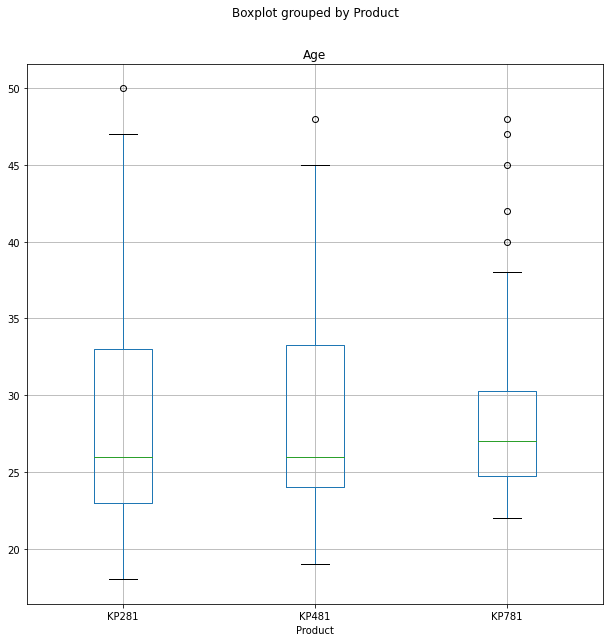

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


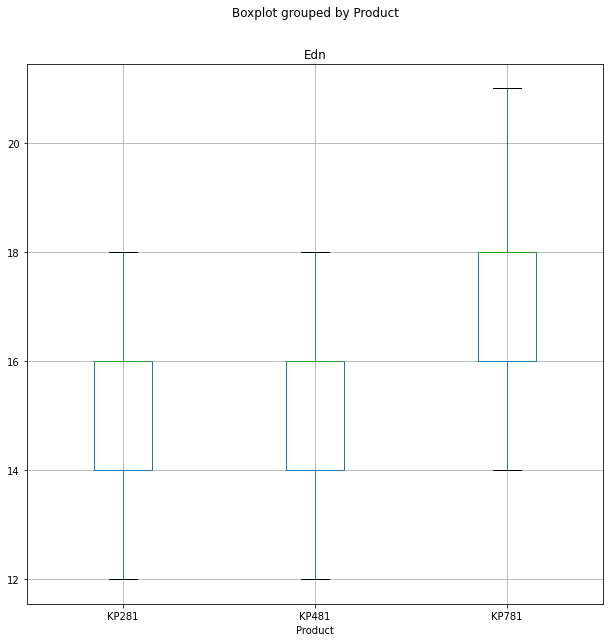

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


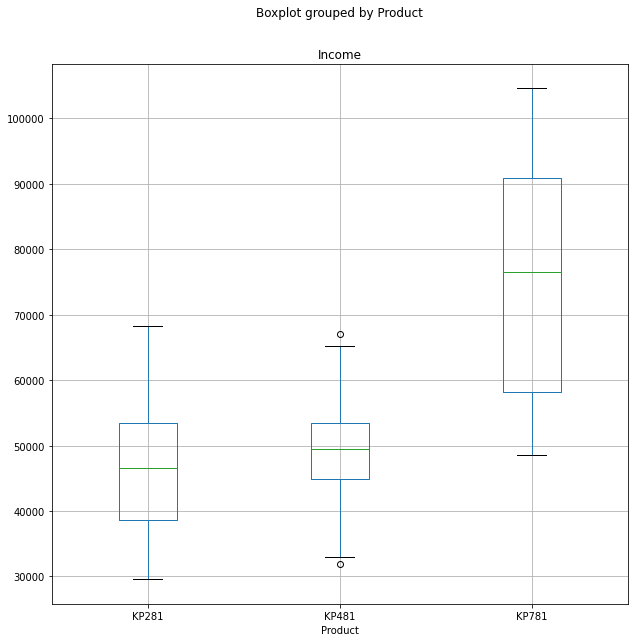

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


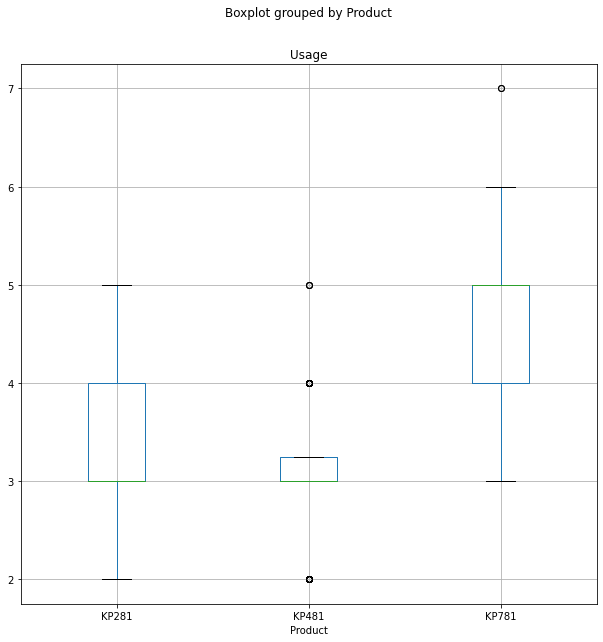

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


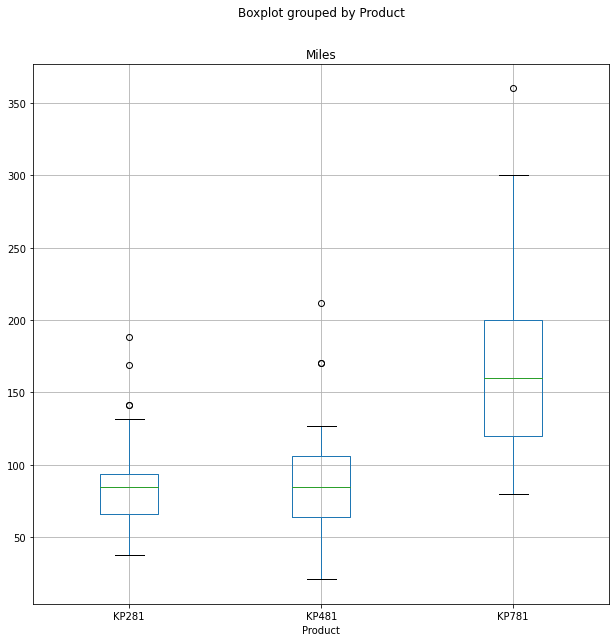

In [6]:
cols=['Age','Edn','Income','Usage','Miles']
for i in cols:
  aerofit.boxplot(by='Product',column=i,figsize=(10,10))
  plt.show()

Product Usage across Gender,Fitness level and Marital Status

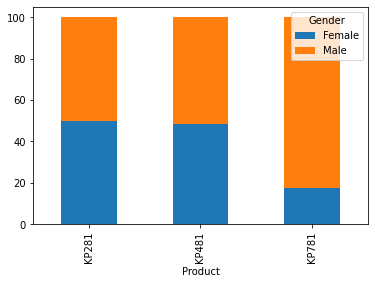

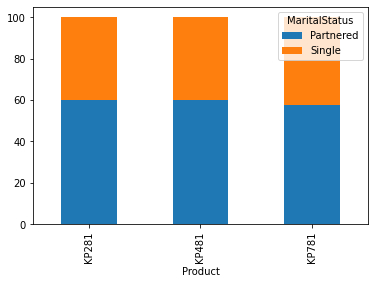

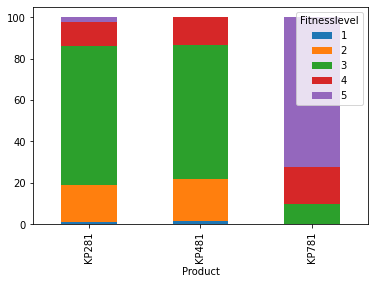

In [7]:
cols=['Gender','MaritalStatus','Fitnesslevel']
for i in cols:
  df=(aerofit.groupby(['Product',i]).size()*100/aerofit.groupby('Product').size()).reset_index(name='percent')
  df.pivot(index='Product',columns=i,values='percent').plot.bar(stacked=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


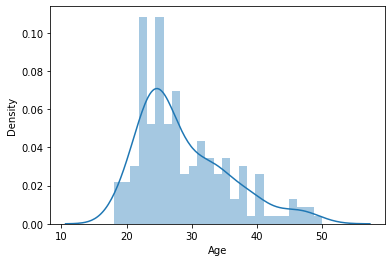

In [8]:
sns.distplot(aerofit['Age'],bins=25)
plt.show()

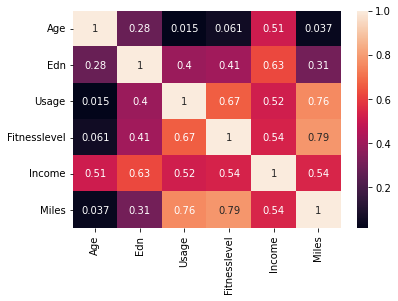

In [9]:
sns.heatmap(aerofit.corr(),annot=True)

Hypothesis test to check whether the mean Income for males is not equal to the mean Income for females

In [10]:
#Ho:mean Income for males=mean Income for females
#Ha:mean Income for males!=mean Income for females

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


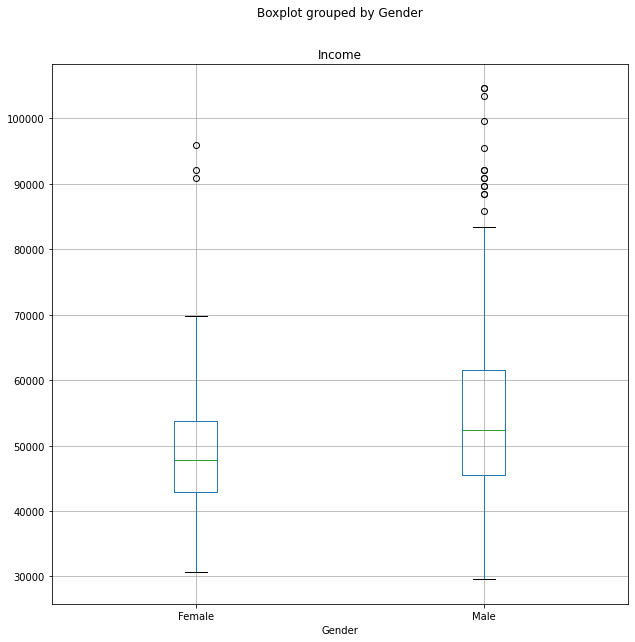

In [11]:
aerofit.boxplot(by='Gender',column='Income',figsize=(10,10))
plt.show()

In [12]:
aerofit.groupby('Gender')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,76.0,49828.907895,12557.690428,30699.0,42921.75,47754.0,53796.00,95866.0
Male,104.0,56562.759615,18421.687779,29562.0,45480.00,52302.0,61611.25,104581.0


In [13]:
#Selecting 76 samples from both the males and females
df_males=aerofit[aerofit['Gender']=='Male']
df_females=aerofit[aerofit['Gender']=='Female']
males=np.random.choice(df_males['Income'],size=76)
females=np.random.choice(df_females['Income'],size=76)

In [14]:
from scipy import stats
alpha=0.05
t_stats,p_val=stats.ttest_ind(males,females,equal_var=False)

In [15]:
p_val
#Conclusion:Mean Income for males is equal to the mean Income for females

0.13202819640892244

In [16]:
mean_males=np.mean(males)
mean_females=np.mean(females)
std_males=np.std(males)
std_females=np.std(females)
se=np.sqrt((std_males**2)/76+(std_females**2)/76)
diff=mean_males-mean_females
ci=(diff-2*se,diff+2*se)
ci

(-1069.258821634101, 7933.89040058146)

Hypothesis test to test whether the mean Usage for different Products are different

In [17]:
#Ho:mean Usage for diferent Products are same
#Ha:At least one product has different mean Usage

In [18]:
aerofit.columns

Index(['Product', 'Age', 'Gender', 'Edn', 'MaritalStatus', 'Usage',
       'Fitnesslevel', 'Income', 'Miles'],
      dtype='object')

In [19]:
aerofit.groupby('Product')['Usage'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
KP281,80.0,3.087500,0.782624,2.0,3.0,3.0,4.00,5.0
KP481,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
KP781,40.0,4.775000,0.946993,3.0,4.0,5.0,5.00,7.0


In [20]:
from scipy.stats import f_oneway
x,pval=f_oneway(aerofit[aerofit['Product']=='KP281']['Usage'].sample(40),
                       aerofit[aerofit['Product']=='KP481']['Usage'].sample(40),
                       aerofit[aerofit['Product']=='KP781']['Usage'].sample(40))

In [21]:
pval
#Conclusion:At least one product has different Mean Usage.

8.83279210992493e-16

Insights:
1)Taking 95% confidence,it is seen that the mean income for males is same as those of mean income for females.The 95% confidence interval shows that the mean income for males is 1175 lower to 8772 higher than the mean income for females.
2)Taking 95% confidence,it is seen that the mean usage hours for at least one product is different from the others.
3)Some of the features in the dataset are highly correlated:fitness level and miles(0.79),miles and usage(0.76),fitness level and usage(0.67),years of education and income(0.63).

4)Costlier products are mainly used by higher earning individuals.The median income of people using product KP281 is 47000 whereas median income of people using product KP481 is 50000 and it is 78000 for people using product KP781
5)The customers who are using the costliest product(KP781) are more satisfied than those who are using other product(KP281 and KP481).Majority of the customers using KP781 have given themselves rating 5(highest rating)whereas majority of the customers using KP281 and KP481 have given themselves average rating(3) or lower.